# Project Introduction

This is an analysis of video game sales data from Ice, a worldwide video game retailer.  We'll take a look at sales data from 2016 and prior to glean insight into formulating an effective marketing campaign moving into 2017.  We'll segment and study data across three main regions (North America, Europe, and Japan), focusing on game platforms, genres, and both user & professional ratings.  With this information we'll form hypotheses, and test the statistical significance between ratings of competing platforms and game genres to assist in adjusting the focus of marketing going forward.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## View the layout of the data

In [2]:
# read in the data
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.0",Sports,41.4,29.0,3.8,8.4,76.0,8,E
1,Super Mario Bros.,NES,"1,985.0",Platform,29.1,3.6,6.8,0.8,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.0",Racing,15.7,12.8,3.8,3.3,82.0,8.3,E
3,Wii Sports Resort,Wii,"2,009.0",Sports,15.6,10.9,3.3,3.0,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.0",Role-Playing,11.3,8.9,10.2,1.0,NaN,NaN,NaN


In [3]:
# make column names lowercase
df.columns = map(str.lower, df.columns)
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15416,The Awakened Fate Ultimatum,PS3,"2,014.0",Role-Playing,0.0,0.0,0.0,0.0,65.0,7.3,T
5969,NBA Live 06,X360,"2,005.0",Sports,0.3,0.0,0.0,0.0,64.0,5.6,E
6339,Transformers: Cybertron Adventures,Wii,"2,010.0",Action,0.1,0.1,0.0,0.0,41.0,6.5,T
6140,Tales of the World: Radiant Mythology 3,PSP,"2,011.0",Role-Playing,0.0,0.0,0.3,0.0,NaN,NaN,NaN
14024,Galaxy Fight,SAT,"1,994.0",Fighting,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5489,Way of the Samurai 2,PS2,"2,003.0",Action,0.1,0.0,0.2,0.0,59.0,9,M
15110,Rengoku II: The Stairway To H.E.A.V.E.N.,PSP,"2,006.0",Action,0.0,0.0,0.0,0.0,51.0,7.6,T
2853,Mobile Suit Gundam: Encounters in Space,PS2,"2,003.0",Simulation,0.1,0.0,0.6,0.0,66.0,8.5,T
2535,Valkyrie Profile,PS,"1,999.0",Role-Playing,0.1,0.1,0.6,0.1,81.0,8.8,T
10942,Yu-Gi-Oh! GX: The Beginning of Destiny (US sales),PS2,"2,007.0",Strategy,0.1,0.0,0.0,0.0,NaN,NaN,NaN


In [4]:
# get info on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,"16,446.0","16,715.0","16,715.0","16,715.0","16,715.0","8,137.0"
mean,"2,006.5",0.3,0.1,0.1,0.0,69.0
std,5.9,0.8,0.5,0.3,0.2,13.9
min,"1,980.0",0.0,0.0,0.0,0.0,13.0
25%,"2,003.0",0.0,0.0,0.0,0.0,60.0
50%,"2,007.0",0.1,0.0,0.0,0.0,71.0
75%,"2,010.0",0.2,0.1,0.0,0.0,79.0
max,"2,016.0",41.4,29.0,10.2,10.6,98.0


In [6]:
# platforms
platforms = df['platform'].sort_values().unique()
platforms

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [7]:
# years
years = df['year_of_release'].sort_values().unique()
years

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [8]:
genres = df['genre'].sort_values().unique()
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [9]:
user_inputs = df['user_score'].sort_values().unique()
user_inputs

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
# check for duplicates
df.duplicated().sum()

0

## Clean the game data
### Checking for outliers in critic scores. Outliers in the 'critic_score' column account for less than half a percent of the overall scores, thus not significant.

In [11]:

# calculate iqr
q1 = df['critic_score'].quantile(0.25)
q3 = df['critic_score'].quantile(0.75)
iqr = q3 - q1

# check for outliers in 'critic_score' before dealing with missing values
threshold = 1.5
outliers = df[(df['critic_score'] < q1 - threshold * iqr) | (df['critic_score'] > q3 + threshold * iqr)]
outliers

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
622,Game Party,Wii,"2,007.0",Misc,1.5,0.8,0.0,0.2,25.0,4.3,E
916,Game Party 2,Wii,"2,008.0",Misc,1.3,0.4,0.0,0.2,29.0,4.6,E
1050,Deal or No Deal,DS,"2,007.0",Misc,1.1,0.4,0.0,0.1,20.0,1.9,E
1562,Jillian Michaels' Fitness Ultimatum 2009,Wii,"2,008.0",Sports,1.0,0.2,0.0,0.1,30.0,2,E
5070,The Golden Compass,PSP,NaN,Action,0.1,0.2,0.0,0.1,28.0,4.1,E10+
...,...,...,...,...,...,...,...,...,...,...,...
15768,Pulse Racer,XB,"2,003.0",Racing,0.0,0.0,0.0,0.0,24.0,2.8,E
15925,Zoey 101: Field Trip Fiasco,DS,"2,007.0",Action,0.0,0.0,0.0,0.0,31.0,tbd,E
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.0,0.0,0.0,0.0,26.0,2.7,T
16318,Thunder Alley,GBA,"2,004.0",Racing,0.0,0.0,0.0,0.0,23.0,tbd,E


### I cannot account for the missing 'year_of_release' values, so I will drop them along with the missing names and genres.  I can only surmise these games with no discernable year are likely yet to be released, or were perhaps limited market test releases as some have sales and rating data attached.

In [12]:
df.drop(df[df.year_of_release.isnull()].index, inplace = True) #remove null values in year of release column
df.drop(df[df.name.isnull()].index, inplace = True) #remove null values in name column
df.drop(df[df.genre.isnull()].index, inplace = True) #remove null values in genre column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


### I'm changing the 'year_of_release' data types to int as they are all intended as round numbers and don't require decimals.

In [13]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11202,Sloane to MacHale no Nazo no Monogatari 2,DS,2009,Puzzle,0.0,0.0,0.1,0.0,NaN,NaN,NaN
5989,UEFA Euro 2016,PS4,2016,Sports,0.0,0.2,0.0,0.0,72.0,6.6,E
6632,LEGO Star Wars III: The Clone Wars,PC,2011,Action,0.1,0.1,0.0,0.0,76.0,7.5,E10+
13933,NatGeo Challenge! Wild Life,Wii,2010,Misc,0.0,0.0,0.0,0.0,NaN,NaN,NaN
15569,UFO: Trilogy,PC,2007,Strategy,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2795,Split/Second,PS3,2010,Racing,0.3,0.3,0.0,0.1,NaN,NaN,NaN
11420,Knights Contract,PS3,2011,Action,0.0,0.0,0.0,0.0,51.0,6,M
11583,Resident Evil 6,PS4,2016,Shooter,0.1,0.0,0.0,0.0,60.0,6.7,M
8495,F1 2011,3DS,2011,Racing,0.1,0.1,0.0,0.0,59.0,6.8,E
5130,Hell's Kitchen: The Game,DS,2008,Simulation,0.3,0.0,0.0,0.0,NaN,NaN,NaN


### For the value of 'tbd' in 'user_score' data, I have to surmise that these games were either never alotted a review platform, or data was never collected on them in their respective release markets for some other reason, as many of the games have been publicly available for years.  They appear to be random, and accont for about 14.5% of all games. I will include them as missing values.

In [14]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.5,2.6,0.0,0.7,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.1,1.4,0.0,0.5,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.5,1.0,0.0,0.3,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.6,0.6,0.0,0.2,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.5,0.5,0.0,0.2,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.0,0.0,0.0,0.0,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.0,0.0,0.0,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.0,0.0,0.0,0.0,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.0,0.0,0.0,0.0,NaN,tbd,E


In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

### For games missing a rating, I will fill the missing values with RU for "Rating Unknown" 

In [16]:
df['rating'].fillna('RU', inplace=True)

In [17]:
# create 'total_sales' column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### More games were released between 2006 - 2011 than any other 5 year period.  With game releases peaking in 2008.

In [18]:
# number of games released per year
games_yr = df['year_of_release'].value_counts()
games_yr

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [19]:
# function categorizing release eras
def era_group(year):
    """
    Function returns the era of game release according to:
    - 'retro' if release year is between 1980 - 1999
    - 'modern' if release year is between 2000 - 2009
    - 'recent' if release year >= 2010
    -  otherwise 'unknown' 
    """
    if year < 2000:
        return 'retro'
    elif year < 2014:
        return 'modern'
    elif year >= 2014:
        return 'recent'
    else:
        return 'unknown'

In [20]:
# create new column with era categories
df['era'] = df['year_of_release'].apply(era_group)
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
1466,Yokai Watch 3,3DS,2016,Action,0.0,0.0,1.3,0.0,NaN,NaN,RU,1.3,recent
9858,Pinball Hall of Fame: The Williams Collection,X360,2009,Misc,0.1,0.0,0.0,0.0,83.0,8.3,E10+,0.1,modern
5186,Monster Rancher 3,PS2,2001,Simulation,0.1,0.1,0.1,0.0,77.0,8.5,E,0.4,modern
8541,Warriors Orochi 3,X360,2011,Action,0.1,0.0,0.0,0.0,71.0,8.1,T,0.2,modern
1549,The Sims 2: Nightlife,PC,2005,Simulation,1.2,0.1,0.0,0.0,76.0,6.6,T,1.3,modern
10235,Spyborgs,Wii,2009,Action,0.1,0.0,0.0,0.0,66.0,6.3,T,0.1,modern
13921,Mobile Suit Gundam: Mokuba no Kiseki,PSP,2012,Action,0.0,0.0,0.0,0.0,NaN,NaN,RU,0.0,modern
4967,Farming Simulator 2013,X360,2013,Simulation,0.2,0.1,0.0,0.0,33.0,6.2,E,0.4,modern
807,Mario & Luigi: Dream Team,3DS,2013,Role-Playing,0.9,0.6,0.5,0.1,NaN,NaN,RU,2.1,modern
7358,Viewtiful Joe 2,PS2,2004,Action,0.1,0.1,0.0,0.0,85.0,7.7,T,0.2,modern


In [21]:
# Look at total sales by platform
plat_sales = df.groupby('platform')['total_sales'].sum()
plat_sales.sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS2,"1,233.6"
1,X360,961.2
2,PS3,931.3
3,Wii,891.2
4,DS,802.8
5,PS,727.6
6,PS4,314.1
7,GBA,312.9
8,PSP,289.5
9,3DS,257.8


## A general overview of game sales by subject
### PS2, X360, PS3, Wii, and DS are the top 5 platforms with the majority of total sales across all release years.  Along with platform, lets also look at the most profitable genres and games as well. Action, Sports, and Shooter lead sales all-time among genres.  Wii Sports and Grand Theft Auto V lead are the top games in all-time sales.

In [22]:
# Group each category
sales_by_platform = df.groupby('platform')['total_sales'].agg('sum')
platform_sales = sales_by_platform.sort_values(ascending=False).reset_index()

sales_by_genre = df.groupby('genre')['total_sales'].agg('sum')
genre_sales = sales_by_genre.sort_values(ascending=False).reset_index()

sales_by_game = df.groupby('name')['total_sales'].agg('sum')
game_sales = sales_by_game.sort_values(ascending=False).reset_index()


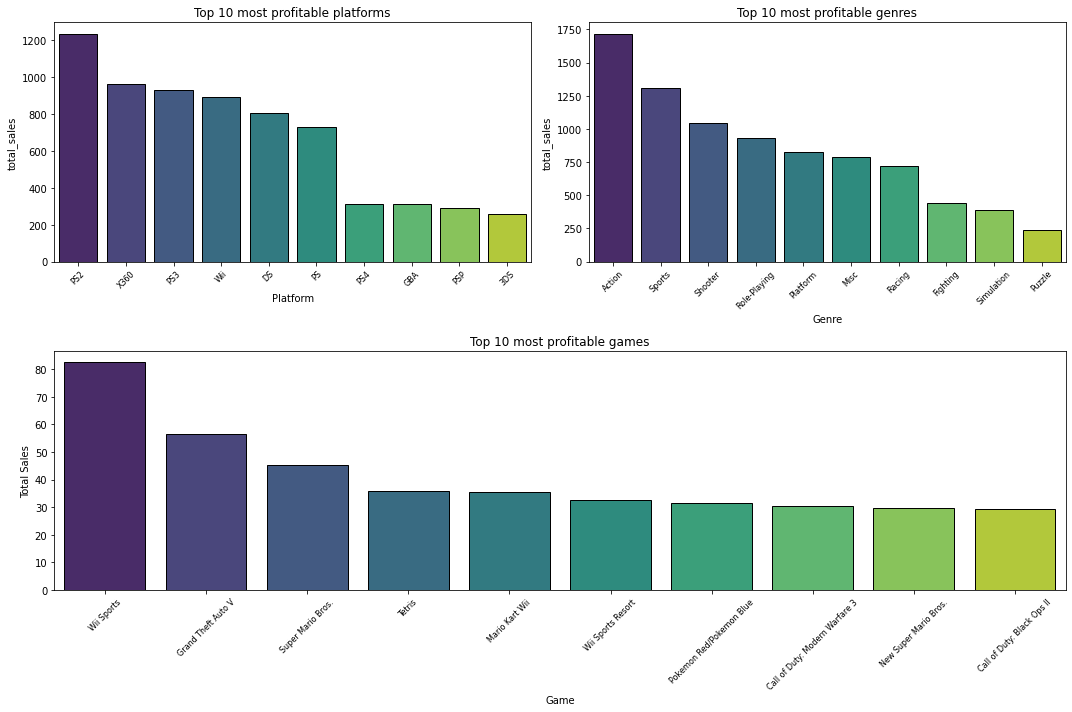

In [23]:
# Plot top 10 for each category
f = plt.figure(figsize=(15, 10))


ax1 = f.add_subplot(221)
sns.barplot(data=platform_sales[:10], x='platform', y='total_sales', edgecolor='black', palette='viridis')
ax1.set_title('Top 10 most profitable platforms')
ax1.set_xlabel('Platform')
ax1.tick_params(axis='x', labelsize=8, rotation=45)

ax2 = f.add_subplot(222)
sns.barplot(data=genre_sales[:10], x='genre', y='total_sales', edgecolor='black', palette='viridis')
ax2.set_title('Top 10 most profitable genres')
ax2.set_xlabel('Genre')
ax2.tick_params(axis='x', labelsize=8, rotation=45)

ax3 = f.add_subplot(212)
sns.barplot(data=game_sales[:10], x='name', y='total_sales', edgecolor='black', palette='viridis')
ax3.set_title('Top 10 most profitable games')
ax3.set_xlabel('Game')
ax3.tick_params(axis='x', labelsize=8, rotation=45)

f.tight_layout()
plt.ylabel('Total Sales')
plt.show()


### Looking at all game sales year-over-year, we see a ramp up in total sales from 2000-2007 peaking in 2008-2009, followed by a pull-back in sales from 2010-2016. 

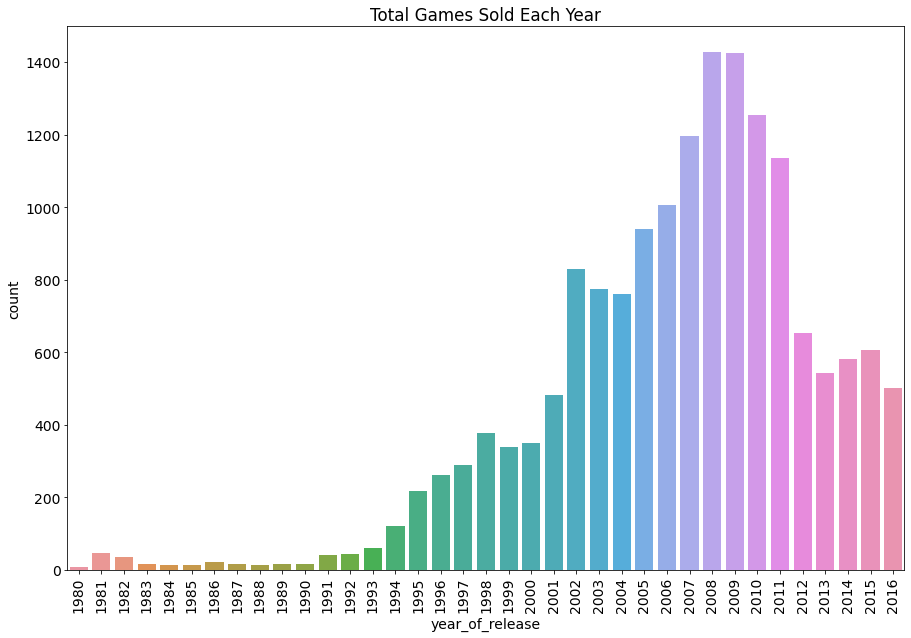

In [24]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
sns.countplot(x='year_of_release', data=df)
plt.title('Total Games Sold Each Year')
plt.xticks(rotation=90)
plt.show()

## Focus on the relevant data
### Looking at the game sales by platform year-by-year, we see some platform lifespans in terms of sales.  Moving forward we will focus on the platforms that are currently still selling games to gain insights on the current market. This includes 3DS, PC, PS3, PS4, Wii, WiiU, X360, and XOne from 2010-2016.

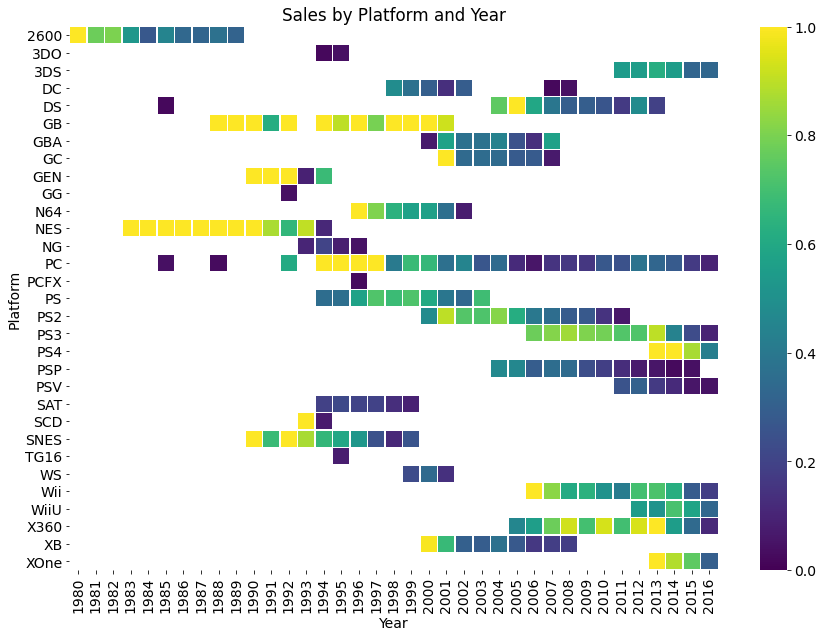

In [25]:
popular_plat_yr = df.pivot_table(index='platform', columns='year_of_release', values='total_sales')
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
sns.heatmap(popular_plat_yr, cmap='viridis', vmin=0, vmax=1, center=0.50, annot=False, fmt=".1f", square=True, linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.title('Sales by Platform and Year')
plt.show()

### Taking a closer look at the relevant platforms in recent years, we see the more recently released are still popular (PS4, XOne, 3DS, and WiiU) and some older have faded out of sales all together (DS, PS2).

In [26]:
relevant_plats = ['PS3', 'PS4', 'XOne', 'X360', 'PC', '3DS', 'Wii', 'WiiU']
recent_df = df.query("era == 'recent' & ['PSP', 'PSV'] not in platform")
plot_recent_relevant = recent_df.pivot_table(index='platform', columns='year_of_release', values='total_sales') 

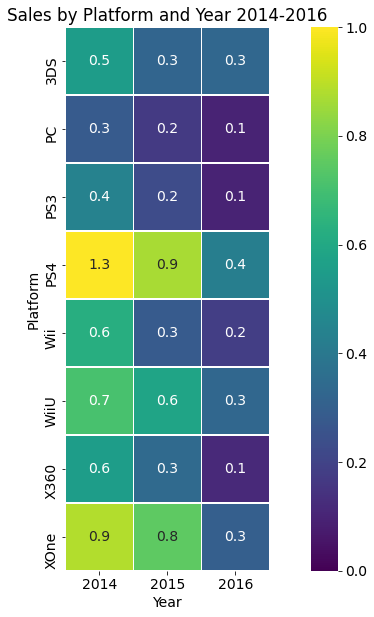

In [27]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
sns.heatmap(plot_recent_relevant, cmap='viridis', vmin=0, vmax=1, center=0.50, annot=True, fmt=".1f", square=True, linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.title('Sales by Platform and Year 2014-2016')
plt.show()

### There are significant differences in sales among recent games by platform.  Games among PS3, PS4, X360, and XOne share the most sales distribution similarity.  A significant number of outliers among all the platforms pull the average sales (denoted by the green arrow) for each far above the median sales numbers.

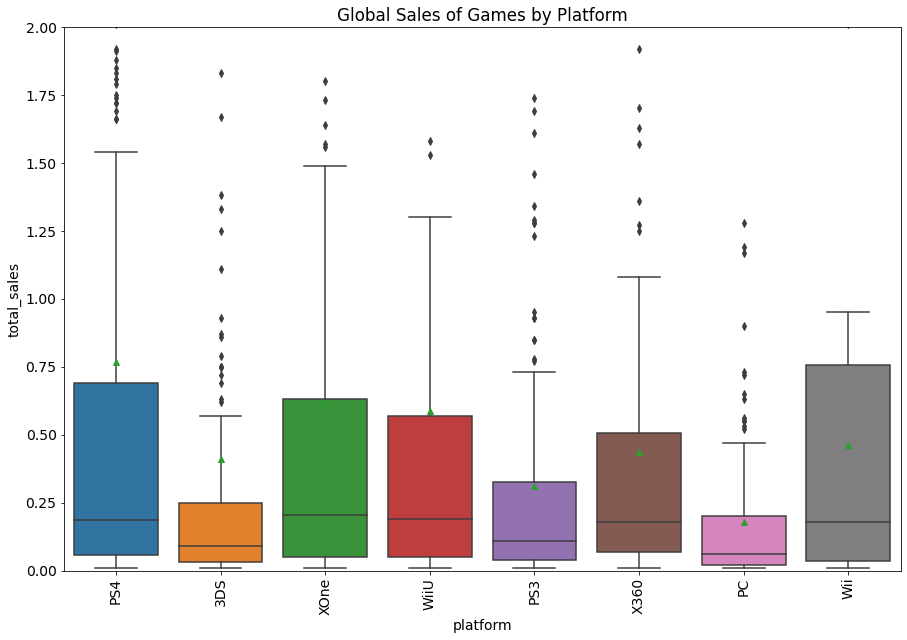

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=recent_df, x='platform', y='total_sales', showmeans=True)
plt.ylim(0, 2.0)
plt.xticks(rotation=90)
plt.title('Global Sales of Games by Platform')
plt.show()

### Let's look at the user and professional reviews for PS4 games, since it's the 2016 top selling platform, and see how they might affect game sales.  While there appears to be a linear correllation between the user and critic scores respectively, it appears that user ratings have a relatively low correllation with most sales worldwide.  However, we do see a slightly more relevant correllation between critic reviews, meaning professional reviews are more likely to have an affect upon worldwide game sales.

In [29]:
ps4_df = recent_df[recent_df['platform'] == 'PS4']
ps4_df['critic_score'] = (ps4_df['critic_score'] / 10) # divide critic score by 10 to match the user scale from 1 - 10.
ps4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16585
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    int64  
 3   genre            376 non-null    object 
 4   na_sales         376 non-null    float64
 5   eu_sales         376 non-null    float64
 6   jp_sales         376 non-null    float64
 7   other_sales      376 non-null    float64
 8   critic_score     237 non-null    float64
 9   user_score       242 non-null    float64
 10  rating           376 non-null    object 
 11  total_sales      376 non-null    float64
 12  era              376 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 41.1+ KB


/tmp/ipykernel_50/976188882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_df['critic_score'] = (ps4_df['critic_score'] / 10) # divide critic score by 10 to match the user scale from 1 - 10.


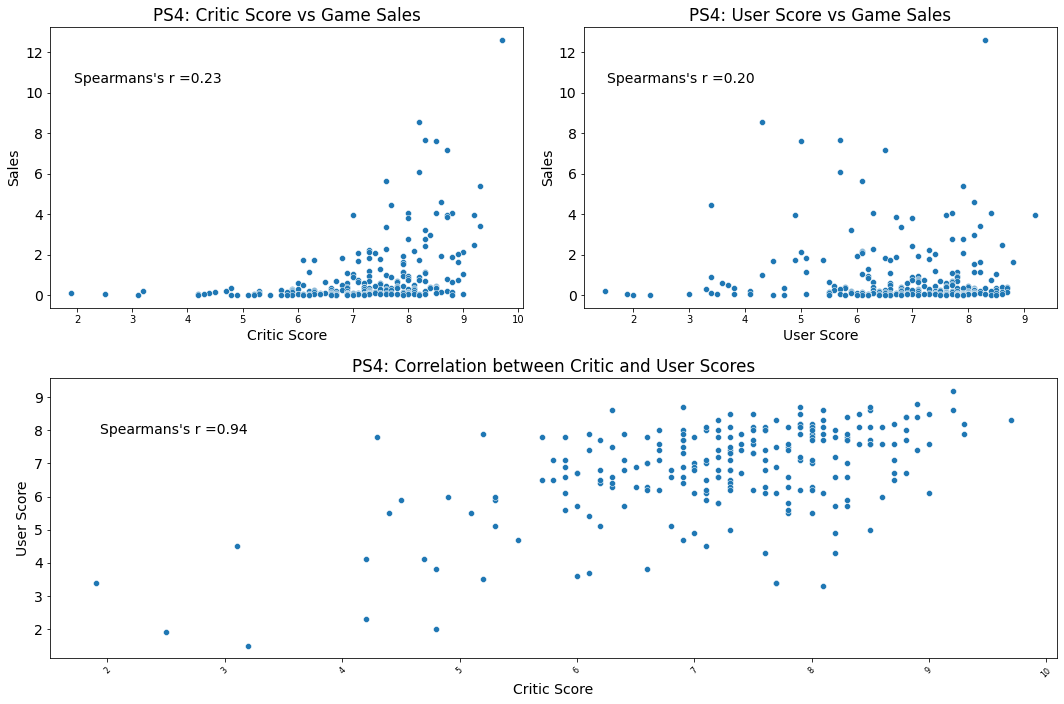

In [30]:
f = plt.figure(figsize=(15, 10))

r1, p1 = st.spearmanr(pd.notnull(ps4_df['critic_score']), ps4_df['total_sales'])
r2, p2 = st.spearmanr(pd.notnull(ps4_df['user_score']), ps4_df['total_sales'])
r3, p3 = st.spearmanr(pd.notnull(ps4_df['critic_score']), pd.notnull(ps4_df['user_score']))

ax1 = f.add_subplot(221)
sns.scatterplot(data=ps4_df, x='critic_score', y='total_sales')
ax1.set_title('PS4: Critic Score vs Game Sales')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='x', labelsize=10)
ax1.text(.05, .8, "Spearmans's r ={:.2f}".format(r1), transform=ax1.transAxes)

ax2 = f.add_subplot(222)
sns.scatterplot(data=ps4_df, x='user_score', y='total_sales')
ax2.set_title('PS4: User Score vs Game Sales')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Sales')
ax2.tick_params(axis='x', labelsize=10)
ax2.text(.05, .8, "Spearmans's r ={:.2f}".format(r2), transform=ax2.transAxes)

ax3 = f.add_subplot(212)
sns.scatterplot(data=ps4_df, x='critic_score', y='user_score')
ax3.set_title('PS4: Correlation between Critic and User Scores')
ax3.set_xlabel('Critic Score')
ax3.set_ylabel('User Score')
ax3.tick_params(axis='x', labelsize=8, rotation=45)
ax3.text(.05, .8, "Spearmans's r ={:.2f}".format(r3), transform=ax3.transAxes)


f.tight_layout()
plt.show()

### Now let's see if what we saw with PS4 game ratings holds true for it's competitor, XOne. While the correllation between critic and user ratings remains linear across both platforms, correllation between critic reviews and sales is actually slightly stronger in comparison to the same game sales on PS4.

In [31]:
xone_df = recent_df[(recent_df['platform'] == 'XOne') & (recent_df['name'].isin(ps4_df['name']))]
xone_df['critic_score'] = (xone_df['critic_score'] / 10)
xone_df.sample(10)

/tmp/ipykernel_50/2642680856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xone_df['critic_score'] = (xone_df['critic_score'] / 10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era
2214,Dragon Age: Inquisition,XOne,2014,Role-Playing,0.6,0.3,0.0,0.1,8.5,6.9,M,0.9,recent
4406,Disney Infinity 2.0: Marvel Super Heroes,XOne,2014,Action,0.2,0.1,0.0,0.0,NaN,NaN,RU,0.4,recent
16140,Dead Rising,XOne,2016,Action,0.0,0.0,0.0,0.0,NaN,8.8,M,0.0,recent
1948,Overwatch,XOne,2016,Shooter,0.6,0.3,0.0,0.1,9.1,5.6,T,1.1,recent
754,FIFA 15,XOne,2014,Sports,0.6,1.4,0.0,0.2,8.2,5.4,E,2.2,recent
373,Assassin's Creed: Unity,XOne,2014,Action,2.3,0.9,0.0,0.3,7.2,4.1,M,3.5,recent
2991,Wolfenstein: The New Order,XOne,2014,Shooter,0.3,0.3,0.0,0.1,7.9,7.8,M,0.7,recent
14661,Batman: A Telltale Game Series,XOne,2016,Adventure,0.0,0.0,0.0,0.0,NaN,4.3,M,0.0,recent
6601,Final Fantasy Type-0,XOne,2015,Role-Playing,0.2,0.1,0.0,0.0,NaN,NaN,RU,0.2,recent
7513,Saints Row IV,XOne,2015,Action,0.1,0.1,0.0,0.0,NaN,NaN,RU,0.2,recent


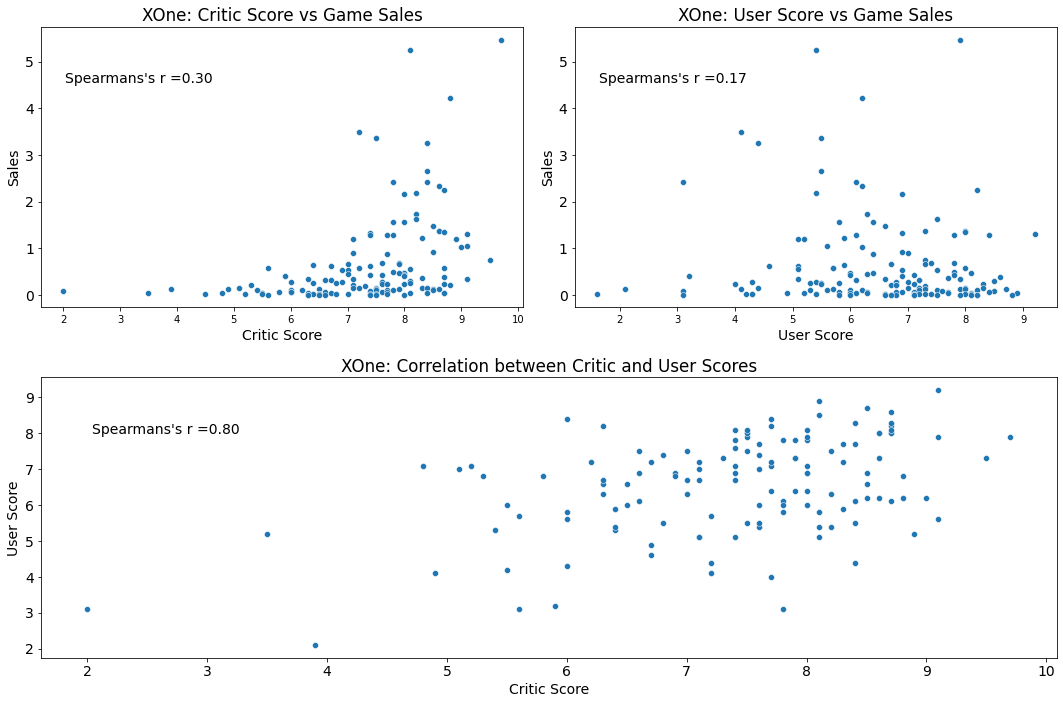

In [32]:
f = plt.figure(figsize=(15, 10))

r1, p1 = st.spearmanr(pd.notnull(xone_df['critic_score']), xone_df['total_sales'])
r2, p2 = st.spearmanr(pd.notnull(xone_df['user_score']), xone_df['total_sales'])
r3, p3 = st.spearmanr(pd.notnull(xone_df['critic_score']), pd.notnull(xone_df['user_score']))

ax1 = f.add_subplot(221)
sns.scatterplot(data=xone_df, x='critic_score', y='total_sales')
ax1.set_title('XOne: Critic Score vs Game Sales')
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='x', labelsize=10)
ax1.text(.05, .8, "Spearmans's r ={:.2f}".format(r1), transform=ax1.transAxes)

ax2 = f.add_subplot(222)
sns.scatterplot(data=xone_df, x='user_score', y='total_sales')
ax2.set_title('XOne: User Score vs Game Sales')
ax2.set_xlabel('User Score')
ax2.set_ylabel('Sales')
ax2.tick_params(axis='x', labelsize=10)
ax2.text(.05, .8, "Spearmans's r ={:.2f}".format(r2), transform=ax2.transAxes)

ax3 = f.add_subplot(212)
sns.scatterplot(data=xone_df, x='critic_score', y='user_score')
ax3.set_title('XOne: Correlation between Critic and User Scores')
ax3.set_xlabel('Critic Score')
ax3.set_ylabel('User Score')
ax3.tick_params(axis='x')
ax3.text(.05, .8, "Spearmans's r ={:.2f}".format(r3), transform=ax3.transAxes)


f.tight_layout()
plt.show()

### With our focus on 'recent' game sales let's take a look at the general distribution of games by genre.  There were far more action games released between 2014-2016 than any other genre, followed distantly by role-playing and sports games.  However, in terms of worldwide sales, shooter games proved to be the most profitable, followed by sports and role-playing games.  Puzzle games had the least amount of releases, and were among the lowest revenue producing genres, along with platform and strategy games. Generally, across genres, the more games released, the higher sales tend to be, with a few exceptions, as seen with the inverse case of platform games.

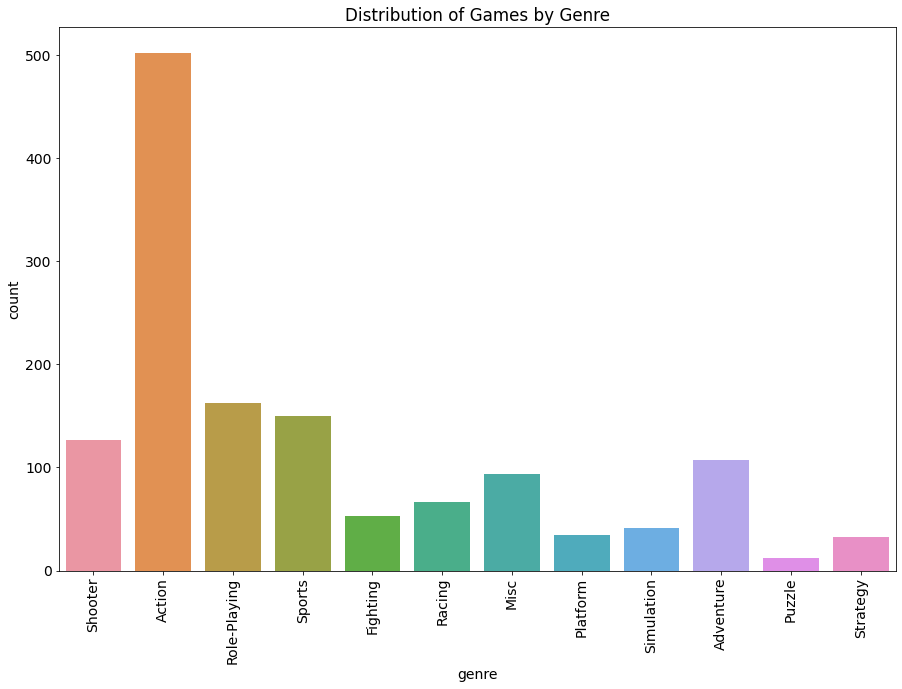

In [33]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
sns.countplot(x='genre', data=recent_df)
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=90)
plt.show()

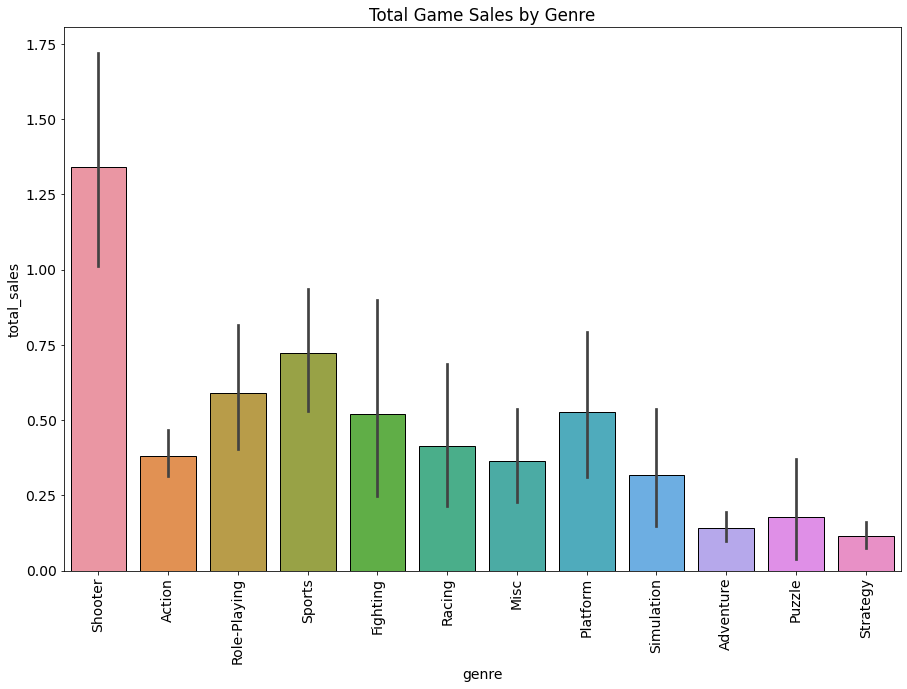

In [34]:
genre_sales = recent_df.groupby('genre')['total_sales'].sum().reset_index()
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
sns.barplot(x='genre', y='total_sales', data=recent_df, edgecolor='black')
plt.title('Total Game Sales by Genre')
plt.xticks(rotation=90)
plt.show()

In [35]:
releases_genre = recent_df.groupby('genre')['name'].size() # Number of game releases per genre 2014-2016
releases_genre.sort_values(ascending=False).reset_index()

,genre,name
0,Action,502
1,Role-Playing,162
2,Sports,150
3,Shooter,127
4,Adventure,107
5,Misc,94
6,Racing,66
7,Fighting,53
8,Simulation,41
9,Platform,34


### Now let's have a look at some 'recent' metrics among the three main sales regions: North America, Europe, and Japan.  Vizualizing the market shares of each platform among the regions we can see that they all have independent top performing platforms:  PS4 and X360 in North America, 3DS in Japan, and PS4 in Europe. However, PS3 and PS4 both show up in each regions' top 5 platforms in some share of the market from 2014-2016.

In [36]:
plat_na = recent_df.groupby('platform')['na_sales'].sum()
top_plat_na = plat_na.sort_values(ascending=False).reset_index()

plat_eu = recent_df.groupby('platform')['eu_sales'].sum()
top_plat_eu = plat_eu.sort_values(ascending=False).reset_index()

plat_jp = recent_df.groupby('platform')['jp_sales'].sum()
top_plat_jp = plat_jp.sort_values(ascending=False).reset_index()

regions = [plat_na, plat_jp, plat_eu]
plat_regions = pd.concat(regions, axis=1)
plat_regions.reset_index()

,platform,na_sales,jp_sales,eu_sales
0,3DS,22.6,44.2,16.1
1,PC,7.2,0.0,18.0
2,PS3,22.1,11.2,25.5
3,PS4,98.6,15.0,130.0
4,Wii,2.1,0.0,2.6
5,WiiU,19.4,7.3,13.1
6,X360,28.3,0.1,15.5
7,XOne,81.3,0.3,46.3


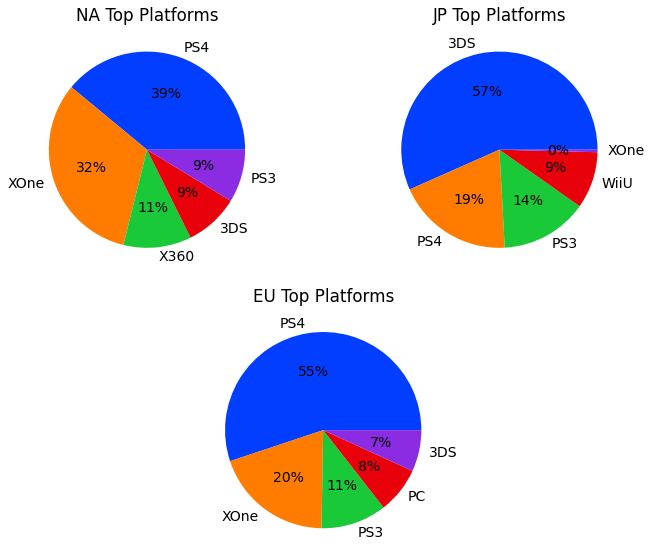

In [37]:
fig = plt.figure(figsize=(10, 8))
palette_color = sns.color_palette('bright')

ax1 = fig.add_subplot(221)
ax1.pie(top_plat_na['na_sales'][:5], labels=top_plat_na['platform'][:5], colors=palette_color, radius=1, autopct='%.0f%%') # pie charts plot to vizualize market shares
ax1.set_title('NA Top Platforms')

ax2 = fig.add_subplot(222)
ax2.pie(top_plat_jp['jp_sales'][:5], labels=top_plat_jp['platform'][:5], colors=palette_color, radius=1, autopct='%.0f%%')
ax2.set_title('JP Top Platforms')

ax3 = fig.add_subplot(212)
ax3.pie(top_plat_eu['eu_sales'][:5], labels=top_plat_eu['platform'][:5], colors=palette_color, radius=1, autopct='%.0f%%')
ax3.set_title('EU Top Platforms')

fig.tight_layout()
plt.show()

### Let's also take a look at the top 5 performing genres across the 3 main game sales regions.  Vizualizing the market shares we see that not only do the action and shooter genres hold the lions share in both North America and Europe, they retain a 44% or greater share among all three regions.  Shooter games are popular in both North America and Europe with a 32% and 29% market share respectively, but only 7% market share in Japan. Role playing games are the Japanese darling genre, encompasing 40% of the market landscape in that region.

In [38]:
genre_na = recent_df.groupby('genre')['na_sales'].sum()
top_genre_na = genre_na.sort_values(ascending=False).reset_index()

genre_eu = recent_df.groupby('genre')['eu_sales'].sum()
top_genre_eu = genre_eu.sort_values(ascending=False).reset_index()

genre_jp = recent_df.groupby('genre')['jp_sales'].sum()
top_genre_jp = genre_jp.sort_values(ascending=False).reset_index()

regions = [genre_na, genre_jp, genre_eu]
genre_regions = pd.concat(regions, axis=1)
genre_regions.reset_index()

,genre,na_sales,jp_sales,eu_sales
0,Action,71.9,24.5,73.3
1,Adventure,5.3,1.8,6.4
2,Fighting,12.3,5.9,6.6
3,Misc,14.6,3.7,12.1
4,Platform,6.8,2.6,6.7
5,Puzzle,0.7,0.9,0.5
6,Racing,8.7,1.7,14.1
7,Role-Playing,32.9,26.5,27.7
8,Shooter,78.7,4.9,65.4
9,Simulation,2.6,2.3,7.3


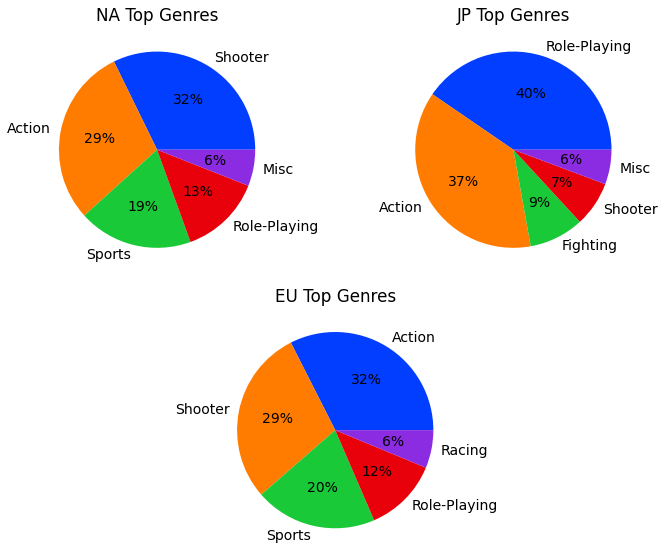

In [39]:
fig = plt.figure(figsize=(10, 8))
palette_color = sns.color_palette('bright')

ax1 = fig.add_subplot(221)
ax1.pie(top_genre_na['na_sales'][:5], labels=top_genre_na['genre'][:5], colors=palette_color, radius=1, autopct='%.0f%%') # pie charts plot to vizualize market shares
ax1.set_title('NA Top Genres')

ax2 = fig.add_subplot(222)
ax2.pie(top_genre_jp['jp_sales'][:5], labels=top_genre_jp['genre'][:5], colors=palette_color, radius=1, autopct='%.0f%%')
ax2.set_title('JP Top Genres')

ax3 = fig.add_subplot(212)
ax3.pie(top_genre_eu['eu_sales'][:5], labels=top_genre_eu['genre'][:5], colors=palette_color, radius=1, autopct='%.0f%%')
ax3.set_title('EU Top Genres')

fig.tight_layout()
plt.show()

### It is important to note that you can play any genre of game on any platform, but combining the above market share information gives us better insight into the most popular cobination of platform and genre for each region.  Japanese consumers are most likely playing role-playing games on 3DS. North American and European consumers are most likely playing action or shooter games on PS4.

### Let's have a look at if ESRB (Entertainment Software Rating Board) ratings have an affect on sales in any or all of the 3 regions.  Looking at the data we can see that most sales in NA and EU are rated 'M' for Mature.  This follows with our above data that indicates that action and shooter games consume 60%+ of the market in those regions.  In JP, most sales come from games where the rating is unknown (RU). This may mean that the ESRB doesn't rate many role-playing games, or they don't have much influence over JP-releases. In any case the correllation coefficient between ESRB ratings and sales among all three regions is low, signaling that these ratings don't have much of an affect on sales regionally, or overall.

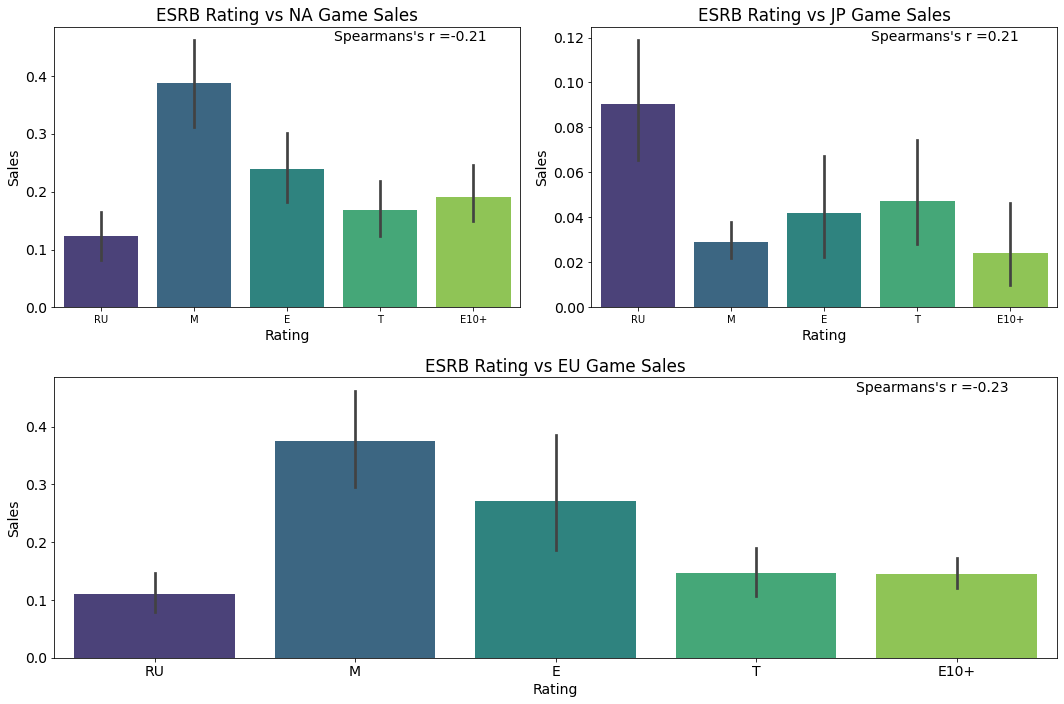

In [40]:
f = plt.figure(figsize=(15, 10))

r1, p1 = st.spearmanr(recent_df['rating'], recent_df['na_sales'])
r2, p2 = st.spearmanr(recent_df['rating'], recent_df['jp_sales'])
r3, p3 = st.spearmanr(recent_df['rating'], recent_df['eu_sales'])

ax1 = f.add_subplot(221)
sns.barplot(data=recent_df, x='rating', y='na_sales', palette='viridis')
ax1.set_title('ESRB Rating vs NA Game Sales')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='x', labelsize=10)
ax1.text(.6, .95, "Spearmans's r ={:.2f}".format(r1), transform=ax1.transAxes)

ax2 = f.add_subplot(222)
sns.barplot(data=recent_df, x='rating', y='jp_sales', palette='viridis')
ax2.set_title('ESRB Rating vs JP Game Sales')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Sales')
ax2.tick_params(axis='x', labelsize=10)
ax2.text(.6, .95, "Spearmans's r ={:.2f}".format(r2), transform=ax2.transAxes)

ax3 = f.add_subplot(212)
sns.barplot(data=recent_df, x='rating', y='eu_sales', palette='viridis')
ax3.set_title('ESRB Rating vs EU Game Sales')
ax3.set_xlabel('Rating')
ax3.set_ylabel('Sales')
ax3.tick_params(axis='x')
ax3.text(.8, .95, "Spearmans's r ={:.2f}".format(r3), transform=ax3.transAxes)


f.tight_layout()
plt.show()

### Let's now test a couple hypothesis based on our data. First, on the average user ratings between XOne and PC, and second on the action and sports genres.  Between these two data series, we will test the p-value against a 5% significance level to determine whether to accept or reject our hypothesis.  5% is an widely agreed upon critical threshold for statisitcal significance, and that is what we will test with here. The null hypothesis will assert that the relationship between average user ratings is equal, while the alternative hypothesis asserts they are not.

## Test Hypothesis 1: 
### H0 = Average user ratings of XOne equal average user ratings of PC
### H1 = Average user ratings of XOne do not equal average user ratings of PC

In [41]:
xbox1 = recent_df[recent_df['platform'] == 'XOne']
xbox1_rating_list = pd.notnull(xbox1['user_score']).tolist()

pc = recent_df[recent_df['platform'] == 'PC']
pc_rating_list = pd.notnull(pc['user_score']).tolist()

xbox1_var = np.var(xbox1_rating_list)
pc_var = np.var(pc_rating_list)

alpha = 0.05 # a critical statistical significance level

results = st.ttest_ind(xbox1_rating_list, pc_rating_list, equal_var=False) # test the equality of the population means

print('P-Value:', results.pvalue)

if results.pvalue < alpha: # compare p-value with significance level
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

P-Value: 0.05500062389862723
We cannot reject the null hypothesis


## Test Hypothesis 2:
### H0 = Average user ratings for the action genre equal average user ratings for the sports genre
### H1 = Average user ratings for the action genre do not equal average user ratings for the sports genre

In [42]:
action_df = recent_df[recent_df['genre'] == 'Action']
action_rating_list = pd.notnull(action_df['user_score']).tolist()

sports_df = recent_df[recent_df['genre'] == 'Sports']
sports_rating_list = pd.notnull(pc['user_score']).tolist()

action_var = np.var(action_rating_list)
sports_var = np.var(sports_rating_list)

alpha = 0.05

results = st.ttest_ind(action_rating_list, sports_rating_list, equal_var=False)

print('P-Value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

P-Value: 2.9085315146857113e-11
We reject the null hypothesis


## Conclusion:
 This report summarizes the overall top games, platforms, genres in terms of worldwide sales. Looking more closely at recent data among actively selling platforms between 2014-2016 to gain insight into market trends and the direction of sales across different regions. The results will be beneficial in the decisions of where and how to allocate marketing moving into 2017. 
 
While overall sales have declined since 2009, there are still viable markets for game sales among certain platforms and genres. Our focus on the more recent game sales data showed where we may want to allocate more directed marketing regionally.

In both North America and Europe, marketing may want to highlight action and shooter games for the PS4 and XOne consoles, as those genres and platforms dominate more than, 60% of those markets.
In Japan however, marketing may choose to focus more heavily on role-playing and action games for the 3DS platform, as those genres and platforms account for over 70% of market share in that region.
Should marketing have to choose one focus for all regions, the action genre for PS4 would be the best combination to blanket a worldwide campaign with.

We established that ESRB rating has very little correllation with overall game sales. However, professional ratings, such as those from critics have a closer to mid-level correllation.  Which means a critic rating of 7 or above could have positive impact on game sales.

Finally, we can state that average user ratings between XOne and PC have a high likelyhood of equating, while the average user ratings among the action and sports genres have very little likelyhood of equity.
As for moving forward into 2017, marketing may want to focus on the platforms whose games sold the most in 2016.  Those platforms are 3DS, PS4, XOne, and WiiU.  All released in 2013, they are not yet "middle aged" in terms of gaming lifespan, and unlikely to fall out of popularity in the next year or two.  Look to the game genres and popular platform predecessors stated above by region, and that should lead you to a solid general marketing strategy. 